In [1]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
</style>
""")

# Clustering
This exercise is about clustering (_K-means clustering_, _Mean-shift clustering_, and _Agglomerative_) pose data used for the exercises in week 2
 and week 10
. The task includes applying and experimenting with each method and then comparing their outcomes. The comparison will be conducted by clustering a sequence of human poses using these three methods in similar steps.
The dataset tensor contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25 \cdot 2$). The shape of the dataset tensor is $(1403, 100, 25 \cdot 2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence.
## Task overview
For each clustering method you will:
- Implement the method.
- Plot the clusters in the sequence.
- Plot the cluster centers.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading00">Task 1: Introduction</a>
            </li>
            <li>
            <a href="#loading_files">Task 2: Setting up the data</a>
            </li>
            <li>
            <a href="#loading">Task 3: Fitting the algorithm</a>
            </li>
            <li>
            <a href="#loading2">Task 4: K-means clustering visualization</a>
            </li>
            <li>
            <a href="#loading02">Task 5: Cluster characteristics 1</a>
            </li>
            <li>
            <a href="#loading022">Task 6: Cluster centers</a>
            </li>
            <li>
            <a href="#loading023">Task 7: Cluster centers</a>
            </li>
            <li>
            <a href="#loading3">Task 8: Elbow Method</a>
            </li>
            <li>
            <a href="#loading4">Task 9: Fitting the mean-shift algorithm</a>
            </li>
            <li>
            <a href="#loading5">Task 10: Visualizing clusters</a>
            </li>
            <li>
            <a href="#loading9">Task 11: Reflection and the bandwith parameter</a>
            </li>
            <li>
            <a href="#loading10">Task 12: Dendrograms</a>
            </li>
            <li>
            <a href="#loading123">Task 13: Dendrogram</a>
            </li>
            <li>
            <a href="#loading11">Task 14: Fitting the agglomerative clustering alg…</a>
            </li>
            <li>
            <a href="#loading12">Task 15: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading122">Task 16: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading13">Task 17: Compare and reflect on the methods</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Introduction💡**
1. Which information can be obtained by clustering a sequence of pose data. Include distance metrics and window size in your discussion.
2. Identify possible pitfalls.


---

In [2]:
# ------ 1 ------------
# To see and understand how different poses correlate, and therefore how how alike
# they are each other. 
# This can also be used (in image recognition purposes) to for example if multible 
# windows are around an object, and we need to determine if they are all describing
# the same object.
# This is done by distance metrics, measuring the closeness of each point, and therefore
# if they are clustered together. There can be different distance metrics,by different methods.


# ------ 2 -------
# There can be different, pifalls for this. These could forexample be that the 
# distance metric are wrong/miscalculated, so data that should not be clustered
# actually gets clustered together.

The following cells import libraries and provide functions for plotting the poses:


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from clustering_utils import *


# Suppress the specific warning
warnings.filterwarnings("ignore")


---
**Task 2 (easy): Setting up the data👩‍💻**
1. Run the cell below to load and reshape the dataset.
2. Choose the 100th pose sequence as the dataset.


---

In [4]:
data = np.load('poses_norm.npy')
N,T,D,C = data.shape
print(data.shape) ##Extra for our understanding
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[99]
print(sequence.shape)

(1403, 100, 25, 2)
(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 

---
**Task 3 (easy): Fitting the algorithm👩‍💻**
1. Run the cell below to create an instance of the `KMeans`
 class with 7 clusters and to find clusters in the sequence.


---

In [5]:
# Specify the number of clusters (k)
k = 8 # orginnally 7

# Create KMeans 
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit to the data
kmeans.fit(sequence)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'



---
**Task 4 (easy): K-means clustering visualization👩‍💻**
1. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 to obtain cluster labels. 
2. Use the `plot_single_pose`
 function from the file `clustering _utils.py`
 to color each pose in the pose sequence according to which cluster it belongs to. 


---

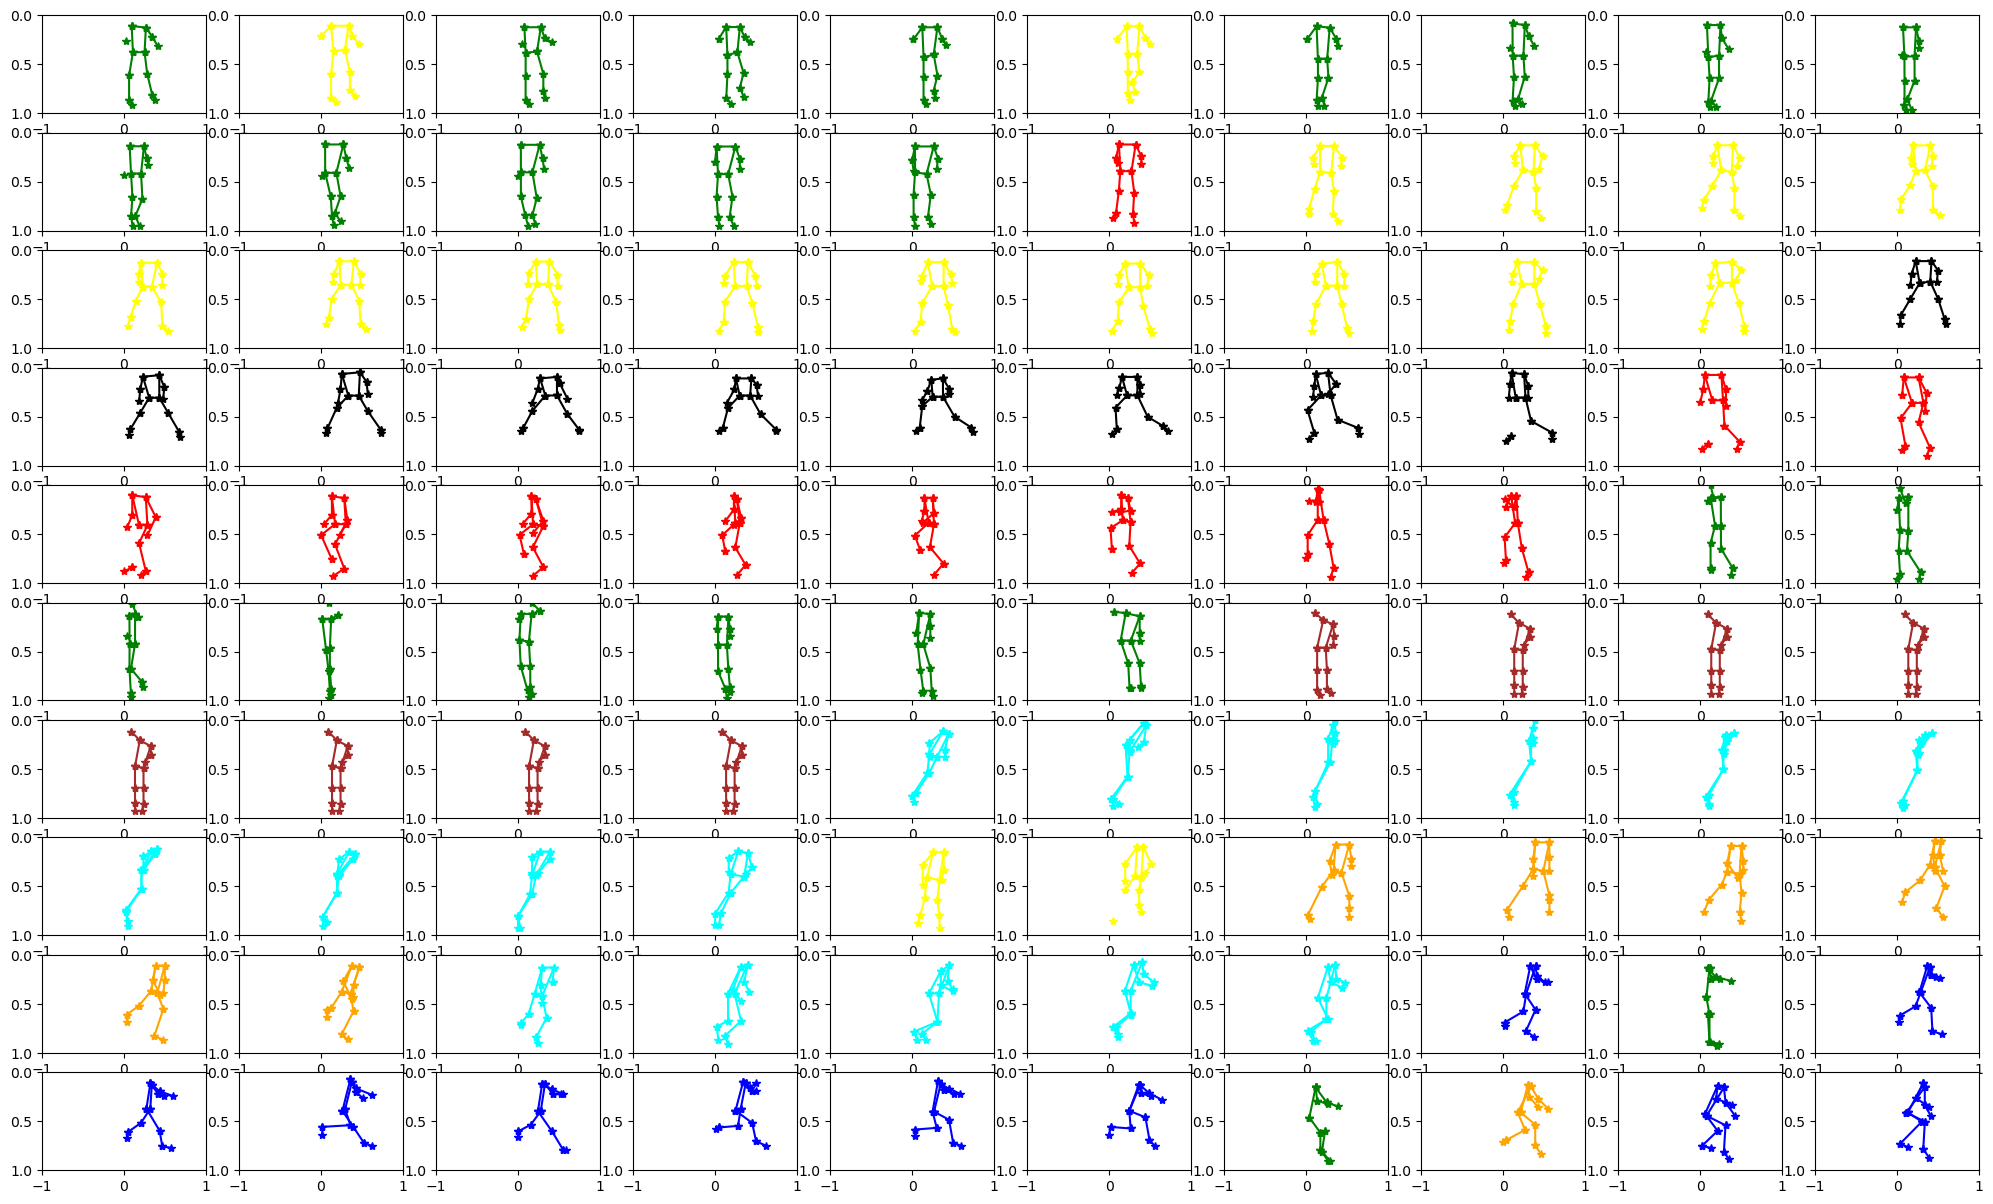

In [6]:
# Write your solution here

# You can now use 'cluster_labels' to see which cluster each frame belongs to
# 'centroids' contains the coordinates of the cluster centers

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_ 

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


---
**Task 5 (easy): Cluster characteristics 1💡**
1. What characterizes the _blue_, _green_ and _red_ poses?


---

In [7]:
# ------ BLUE ---------
# looks like he is jumping to the side, seen from the side. He also has his arms
# out. In general, the torso is close together, while the arms are out, and legs are spread.

# ------ GREEN ---------
# The green points in general describe a person standing on the ground, it looks like.
# His foot in general is close to 1, and therefore not in the air. It maybe also looks like
# he is more "stationary" than in the other colors.

# --------- RED ---------
# In genereal the red looks like he is in the air in the middle of a jump. Can also
# be seen  that it is higher than the 1 value at the bottom, compared to the green.


#  ---------- IN GENERAL -----------
# MAYBE it could also look like it is not directly the "height" of the persons jump, but 
# rather the position on the court.


---
**Task 6 (easy): Cluster centers👩‍💻**
1. Run the cell below to extract and plot the cluster centers.


---

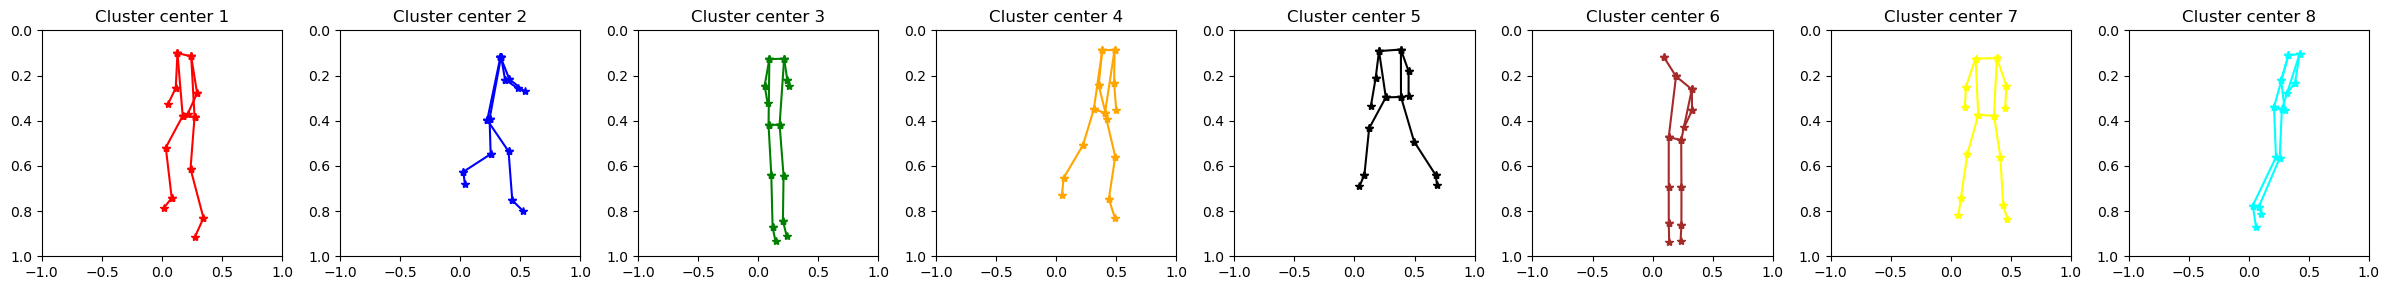

In [8]:
num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


---
**Task 7 (easy): Cluster centers👩‍💻💡📽️**
1. Visually inspect the results and identify the characteristics of the poses in each cluster: 
    - What distinguishes the clusters?
    - What do the cluster centers represent?
    - What do the clusters reveal about poses?
    - How do the cluster centers relate to your observations in [Task 5](#loading02)?


2. Reason about the choice of 7 clusters and the effect on the result.

3. Change the random state and fit the model again. Explain whether you obtain different groupings and why? 



---

In [9]:
# --------- 1 ------------
# - What distinguishes the clusters? -
    # Body orientation, arms and leg positioning, placement in the grid.
# - What do the cluster centers represent? -
    # They represent the average pose of all samples in that cluster.
    # It acts as a "prototype pose" summarizing what a typical 
    # example in that cluster looks like.
# - What do the clusters reveal about poses? -
    # They show which pose categories naturally emerge from the data.
    # This in our case is the common repeated postures or poses that emerge during a
    # badminton match, like a Smash, for example.
# - How do the cluster centers relate to your observations in [Task 5] -
    # In task 5 we speculated on what the common factor of this color was, and now
    # we have the mean, we can actually see what the common measure is.


# ---------- 2 -----------
# We can see that the 7 means are "relatively" different, and looks like describing,
# different poses. If we had less clusters, it would probably be more general, and more clusters
# it would probably, desribe the same poses by more clusters than needed.

# --------- 3 ----------
# Random state  is the seed controlling randomness so your clustering results 
# stay consistent and reproducible.
# So it is basically the starting point of the mean, which then changes after to converge
# closer to the clusters.

# Changing it, does produce different mean poses, however it can in our case be seen
# that the general tendencies prevail, but the color/specifiic grouping changes.

This task is about using the Elbow Method to choose the number of clusters `k`
.

---
**Task 8 (medium): Elbow Method👩‍💻💡📽️**
The cell below:
- Applies k-means clustering to the sequence using each `k`
 in the interval `k_range`
.
- Extracts the within-cluster sum of squares (WCSS) using [`kmeans.intertia_`
](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
 and store it in a list.
- Plots the within-cluster sum of squares as a function of the number of clusters (elbow curve as displayed below) 

1. Explain the reasons for using WCSS to choose the number of clusters. 

2. What charaterizes the optimal WCSS for choosing the number of clusters?

3. Visually determine the optimal number of clusters.

4. Calculate the rate of change for the elbow curve and plot its absolute value. Use the curve to determine the optimal `k`
.

5. Revisit and run the previous tasks ([Task 3](#loading), [Task 4](#loading2) and [Task 5](#loading02) ) with the optimal number of clusters. 

6. How does the elbow method influence the results in the previous tasks?



---

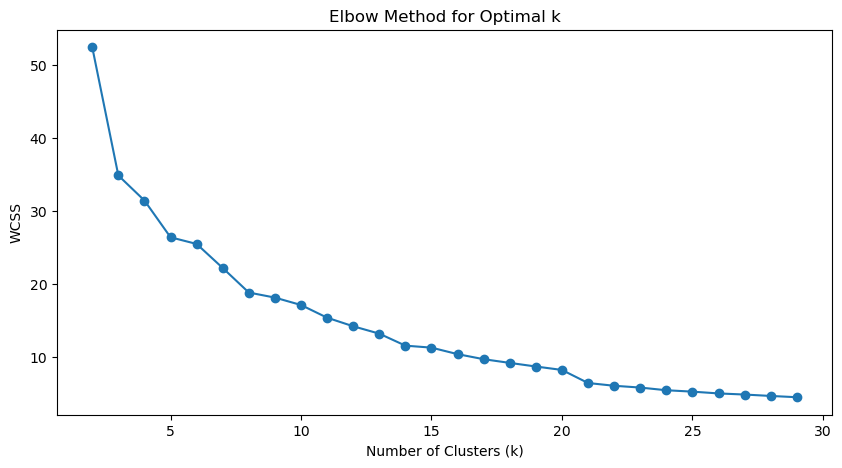

17.559181279254588 this is the 2 to 3
3.4252220180998556 this is the 3 to 4
5.035210883411882 this is the 4 to 5
0.913479690161239 this is the 5 to 6
3.2889068393025553 this is the 6 to 7
3.3613536479486825 this is the 7 to 8
0.6930024205180736 this is the 8 to 9
1.012949924770382 this is the 9 to 10
1.7375764773967557 this is the 10 to 11
1.1742116726451162 this is the 11 to 12
1.0112320985471275 this is the 12 to 13
1.6423820487555947 this is the 13 to 14


In [10]:
# Find the optimal k using the elbow method
k_range = range(2, 30) # values for the number of clusters `k`
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequence)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


# --------- 4 ----------
rate_of_change = np.abs(np.diff(inertia))
print(rate_of_change[0], "this is the 2 to 3")
print(rate_of_change[1], "this is the 3 to 4")
print(rate_of_change[2], "this is the 4 to 5")
print(rate_of_change[3], "this is the 5 to 6")
print(rate_of_change[4], "this is the 6 to 7")
print(rate_of_change[5], "this is the 7 to 8")
print(rate_of_change[6], "this is the 8 to 9")
print(rate_of_change[7], "this is the 9 to 10")
print(rate_of_change[8], "this is the 10 to 11")
print(rate_of_change[9], "this is the 11 to 12")
print(rate_of_change[10], "this is the 12 to 13")
print(rate_of_change[11], "this is the 13 to 14")
threshold= 0.7 # If it is under this, then we determine that it is the optimal
# But left out for simplicity

In [11]:
# -------- 1 -----------
# We want it to best possible describe the poses, without being to general. 
# If we choose a low cluster amount, it will have a high WCSS, so not describe the 
# poses very precise, but generalize them alot. 
# If we choose a too high number of clusters, it will instead be too descriptive of 
# the individual poses, essentially overfitting the data and losing the general 
# structure.

# -------- 2 --------
#It is characterised by the graph "plateuing", aka starts to flatten out. This is why
# it is called the 'elbow' method, so you choose the value of the elbow of the arm.

# -------- 3 ---------
# I determined 8 as the value where it starts to flatten out.

# -------- 4 --------
#*implemented above*

# -------- 5 --------
# * changed k= 7 to 8 *

# ----- 6 ------
# Yes, we have added another cluster, which then better describes the different kinds
# of poses possible.


## Mean-shift Clustering
This exercise is about applying mean-shift clustering to the sequence of poses. 

---
**Task 9 (easy): Fitting the mean-shift algorithm👩‍💻**
1. Run the cell below to:    - create an instance of the `MeanShift()`
 class with a bandwith of 0.629 
    - cluster the pose sequence.




---

In [12]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.429) # orgininally 0.629
mean_shift.fit(sequence)

,bandwidth,0.429
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300



---
**Task 10 (easy): Visualizing clusters👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the `labels_`
 attribute as described in the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers using the `cluster_centers_`
 attribute.


---

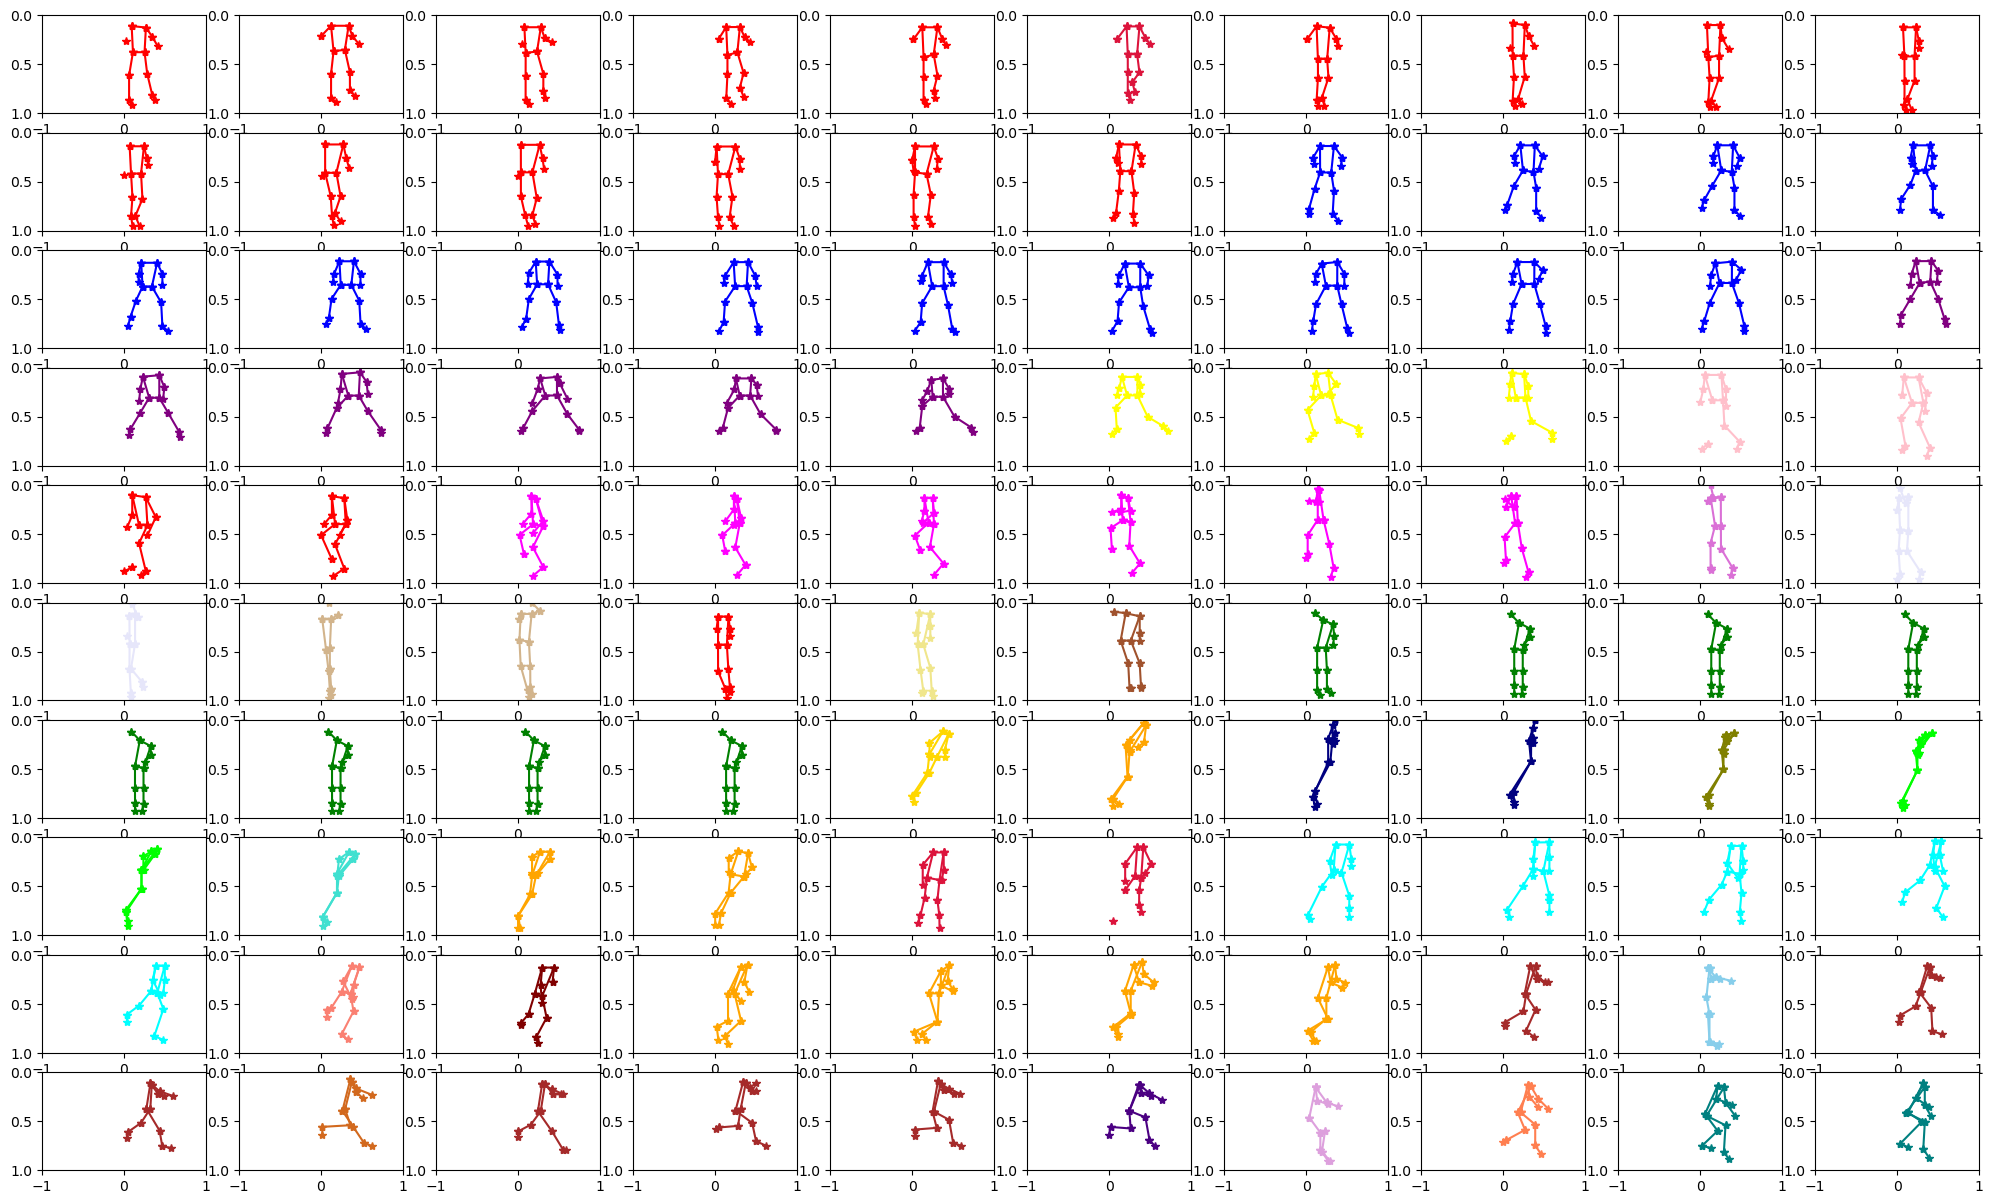

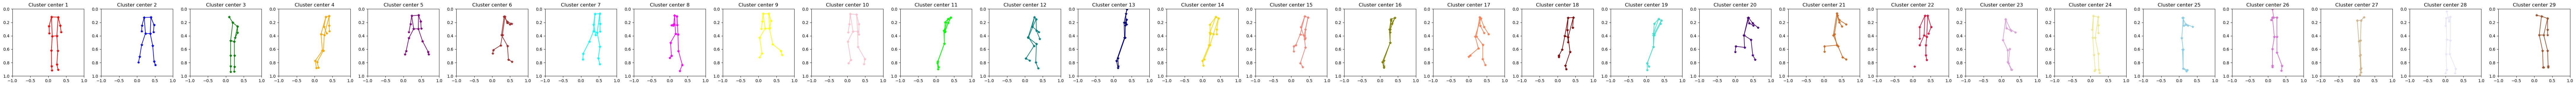

In [13]:
cluster_labels = mean_shift.labels_

colors = {0:"red", 1:"blue", 2:"green", 3:"orange", 4:"purple", 5:"brown", 6:"cyan", 7:"magenta", 8:"yellow", 9:"pink", 10:"lime", 11:"teal", 12:"navy", 13:"gold", 14:"salmon", 15:"olive", 16:"coral", 17:"maroon", 18:"turquoise", 19:"indigo", 20:"chocolate", 21:"crimson", 22:"plum", 23:"khaki", 24:"skyblue", 25:"orchid", 26:"tan", 27:"lavender", 28:"sienna", 29:"aquamarine", 30:"slateblue", 31:"peru", 32:"lightgreen", 33:"firebrick", 34:"mediumseagreen"}
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.show()

## ------- 3 ------------

cluster_centers = mean_shift.cluster_centers_

num_centroids = len(cluster_centers)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

for i in range(len(cluster_centers)):
    plt.subplot(1, len(cluster_centers), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(cluster_centers[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()



---
**Task 11 (easy): Reflection and the bandwith parameter👩‍💻💡**
1. Visually examine the plots. What are the characteristics of the poses belonging to each cluster?
2. What is the purpose and what effect of decreasing and increasing the bandwidth parameter to 0.429 and 0.829 have and why?


**Info**
You might encounter longer run times for lower bandwith values.


---

In [14]:
# -------- 1 ---------
# TODO 

# -------- 2 ----------
# It has the same effect as when we increased/decreased number of clusters for k-means. 
# mean-shift clustering , uses the bendwidth to determine the search window, and if this 
# is low enough, it would create more clusters than what probably is the correct solution, 
# and increasing the bandwidth would create more general clusters, that are not very descriptive.

## Agglomerative Clustering
This exercise is about applying hierarchical clustering to the poses dataset.

---
**Task 12 (easy): Dendrograms👩‍💻**
1. Run the cell below to generate a dendrogram. 


---

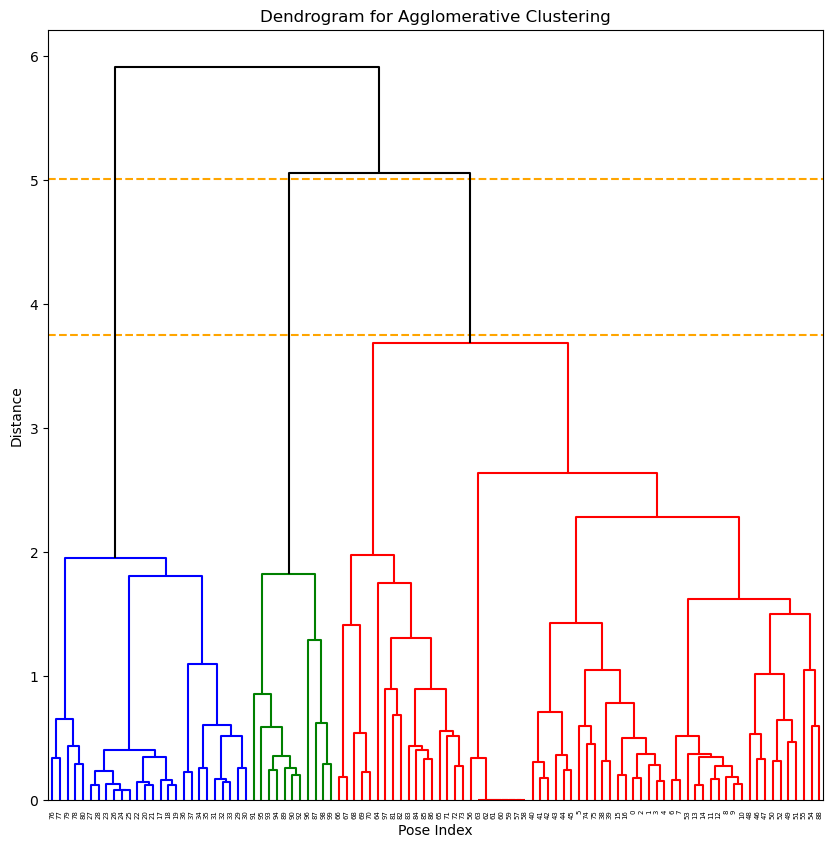

In [15]:
colors = {0: 'black', 1: 'blue', 2: 'green', 3: 'red'}
sns.set_palette([colors[i] for i in range(len(colors))])
shc.set_link_color_palette(None)
plt.figure(figsize=(10,10))
plt.axhline(y=5.01, color='orange', linestyle='--')  # Line to indicate upper horizontal line
plt.axhline(y=3.75, color='orange', linestyle='--')  # Line to indicate lower horizontal line

 # plt.axhline(y=1.5, color='cyan', linestyle='--')  # Line to see 0.5 line
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Pose Index')
plt.ylabel('Distance')
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")
Dendrogram = shc.dendrogram(linkage_matrix)


---
**Task 13 (easy): Dendrogram💡📽️**
1. How can the number of clusters be determined from the dendrogram?
2. What does the location of a merge node in the dendrogram represent? If two points merge at a very low height, what does it tell about them?
3. Explain what a large differences in node location in the dendrogram imply.
4. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?
5. What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?


---

In [16]:
# ------- 1 --------
# We find the largest vertical distance that doesn’t intersect any of the other clusters.
# From this we can draw a horizontal line at both extremeities, and then know what the optimal amount
# of clusters is equal to the amount of vertical lines between the horizontal.

# I have made orange lines to indicate these. Here are 3 clusters(aka. the vertical lines)

# ------ 2 -------
# the merge indicates the distance that two clusters get merged, due to these being the 
# closest at that point.
# The height on the y axis shows that distance at which they were merged.
# So this should be seen as the lowest point, every point has it's own clusters, and then they 
# are merged more and more, the higher distance.

# ------ 3 ------
# The lower this "merge node" between two points exist, the closer/similar two points are to each other.
# If it is higher this merge node, then the two nodes are very dis-similar.

# SO THEREFORE!
# If all points have a very low "distance" to be merged, then the data is not seperated very well.
# (I.e. It is hard to see a specific grouping that is optimal.)
# So large differences are a good sign, because this implies that the algortihm had to increase the 
# distance alot, before it actually creates this into one group.

# ------ 4 -------
#we made a horizontlal line at the different heights and saw theses amount of clusters:
# 0.5  = 41 clusters
# 1.5 = 12 clusters
# 3 = 4 clusters
# 4 = 3 clusters

# ------- 5 ----------
# It provides a direct measure of dis-similarity, where the other measures dont really 
# look at this point.



---
**Task 14 (easy): Fitting the agglomerative clustering algorithm👩‍💻**
1. Run the cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

2. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
3. Extract the cluster labels for each pose in the sequence.
4. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.


---

number of clusters:  3
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 2 0 0] 
 which has size: ' 100 ' So it is what cluster each pose belongs to.


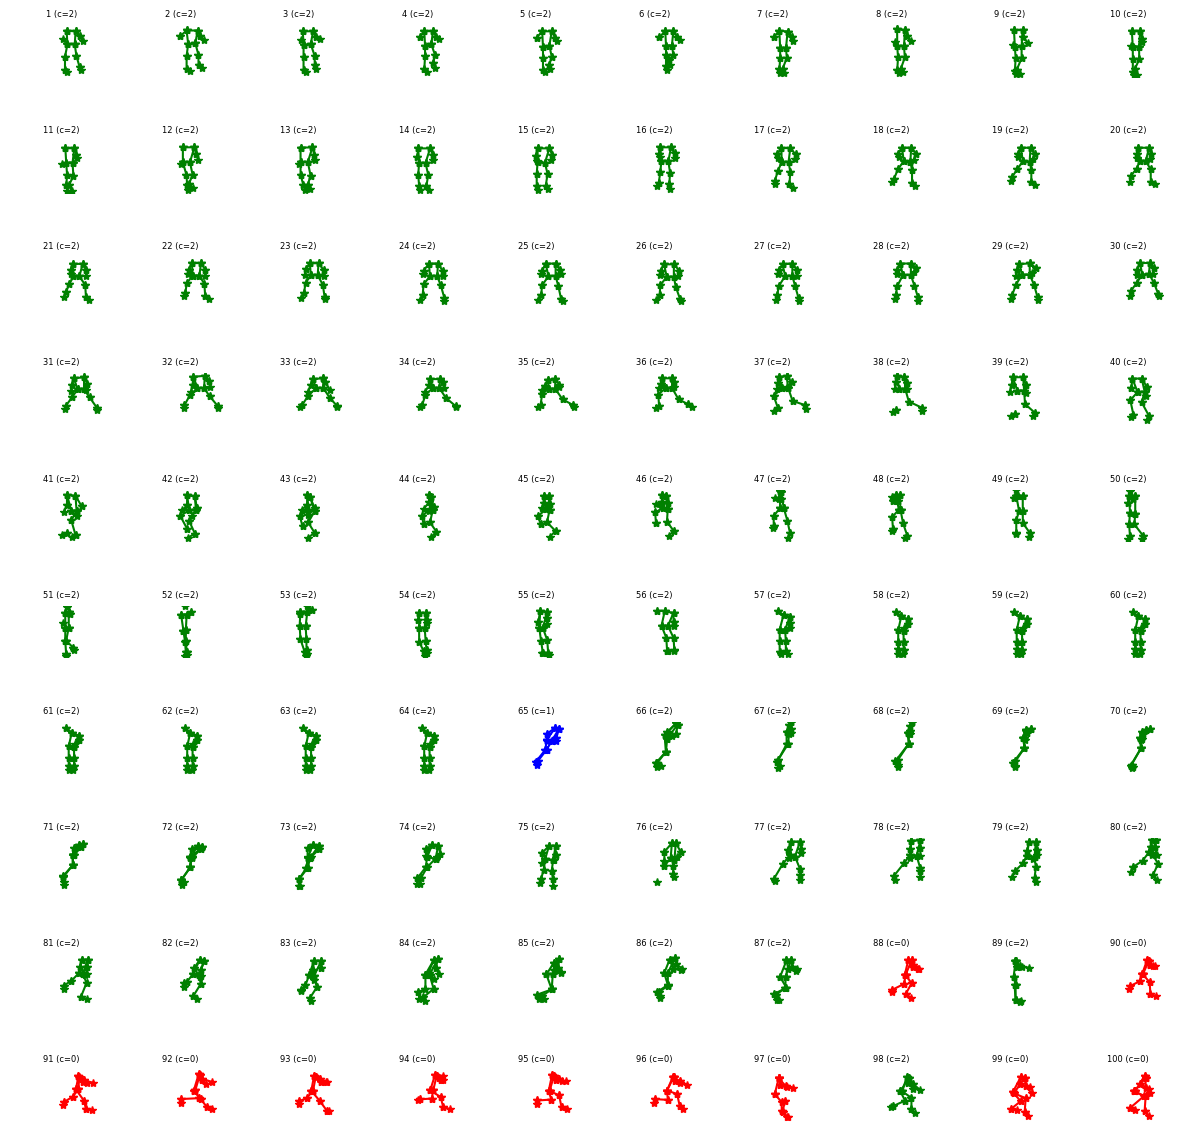

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=None, metric='cosine', linkage='average', distance_threshold=0.11)
#LINKAGE needs to be changed for each of them, when changing cosine, euclidian, etc. (distance threshold also needs to be changed.)

# ------ 1 ----------
apply_agg_clustering = agg_clustering.fit(sequence)

# ------- 2 ---------
## DOCUMENTATION: The number of clusters found by the algorithm. If distance_threshold=None, it will be equal to the given n_clusters.
clusters = apply_agg_clustering.n_clusters_
print("number of clusters: ", clusters)


# ------- 3 --------------
cluster_labels = apply_agg_clustering.labels_
print(cluster_labels, "\n which has size: '", cluster_labels.size, "' So it is what cluster each pose belongs to.")

# ---------- 4 ---------

num_of_labels = len(cluster_labels)
# Set up subplots
fig, axes = plt.subplots(10, 10, figsize=(12, 12))

Three_colors = {0:"red", 1:"blue", 2:"green"}

for i in range(num_of_labels):
    row = i // 10
    col = i % 10
    ax = axes[row, col]

    label = cluster_labels[i]
    pose = sequence[i]

    ax.set_title(f'{i+1} (c={label})', fontsize=6)
    # if plot_single_pose always draws on current axis, do this:
    plt.sca(ax)
    plot_single_pose(pose, c=Three_colors[label], head=False)

    ax.set_ylim(1, 0)
    ax.set_xlim(-1, 1)
    ax.set_aspect('equal')   # <-- critical so poses aren’t stretched
    ax.axis('off')           # optional: hide ticks

plt.tight_layout()
plt.show()


---
**Task 15 (easy): Agglomerative clustreing algorithm mean pose👩‍💻**
1. The `AgglomerativeClustering()`
 class does not have a method for directly extracting cluster centers. Calculate the mean pose within each cluster for $k = 3$  and plot it.
2. Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks ([Task 14](#loading11) and [Task 15](#loading12).1). 


---

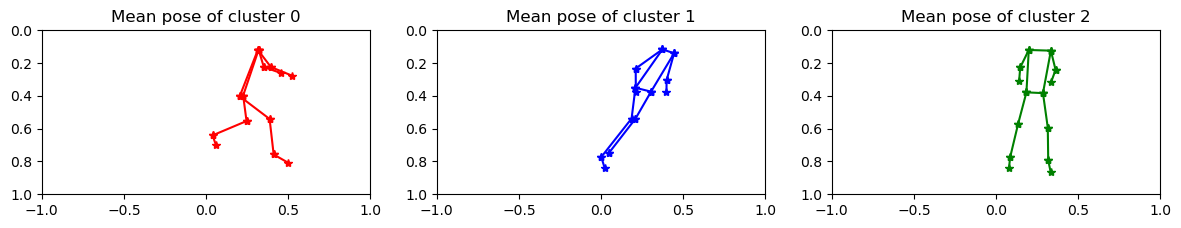

In [41]:
# ------- 1 ------------
K = 3  # k = 3 clusters

mean_poses = []
for k in range(K):
    # all poses assigned to cluster k
    poses_k = sequence[cluster_labels == k]
    # mean pose of cluster k
    mean_pose_k = poses_k.mean(axis=0)
    mean_poses.append(mean_pose_k)

# Plot the 3 mean poses
colors = ["red", "blue", "green"]

fig, axes = plt.subplots(1, K, figsize=(4 * K, 4))

for k in range(K):
    ax = axes[k]
    pose = mean_poses[k]

    plt.sca(ax)  # make this axis active for plot_single_pose
    plot_single_pose(pose, c=colors[k], head=False)
    ax.set_title(f"Mean pose of cluster {k}")
    ax.set_ylim(1, 0)
    ax.set_xlim(-1, 1)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# ----------- 2 ----------



---
**Task 16 (easy): Agglomerative clustreing algorithm mean pose💡📽️**
1. What differences do you observe?
2. Explain why these differences occur? 
3. Does a different distance metric result in more meaningful clusters, why/why not?


---

In [19]:
# Write your reflections here...

## Comparison

---
**Task 17 (medium): Compare and reflect on the methods👩‍💻💡📽️**
1. Compare the clustered poses obtained with the different clustering methods (K-means, Mean-shift and Agglomerative clustering). What are the similarities and differences between the pose clusters across methods?
2. Why can clusters look similar across methods? 
3. What are the main reasons behind differences in the clusters?
4. The algorithms use different methods for determining the number of clusters. How do these differences impact the results for the pose data?


---

In [20]:
# Write your relfection here...